In [165]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [166]:
url="https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv"

In [167]:
df=pd.read_csv(url)

In [168]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [169]:
data=df[["MedInc","Latitude","Longitude"]].copy()

In [170]:
data

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25
...,...,...,...
20635,1.5603,39.48,-121.09
20636,2.5568,39.49,-121.21
20637,1.7000,39.43,-121.22
20638,1.8672,39.43,-121.32


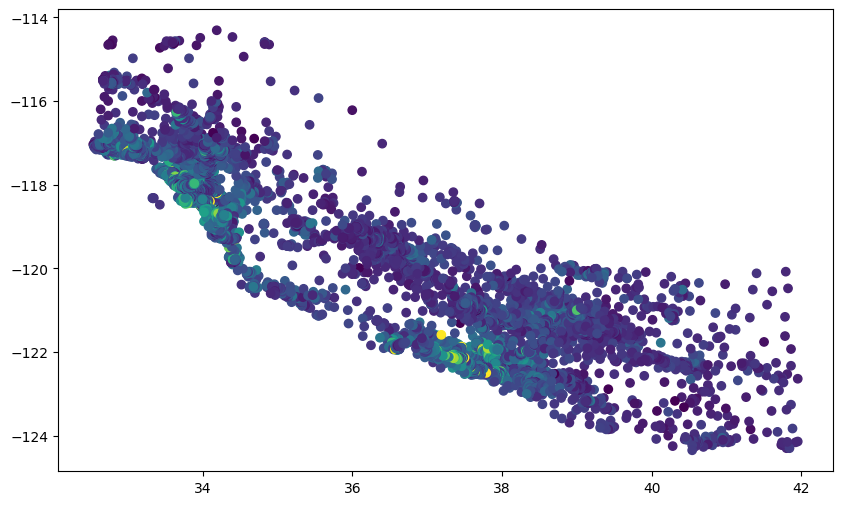

In [171]:
plt.figure(figsize=(10, 6))
plt.scatter(data["Latitude"], data["Longitude"], c=data["MedInc"])


In [172]:
X=data

from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(X, test_size=.20, shuffle=True, random_state=17)

In [173]:
X_train

,MedInc,Latitude,Longitude
18567,3.1327,36.93,-121.75
19533,2.6523,37.66,-120.91
839,5.8704,37.60,-122.06
3333,1.8417,38.92,-122.62
12784,3.8295,38.65,-121.44
...,...,...,...
9529,2.7171,38.94,-123.15
406,6.9414,37.90,-122.27
13702,2.5875,34.11,-117.23
2191,3.0870,36.74,-120.07


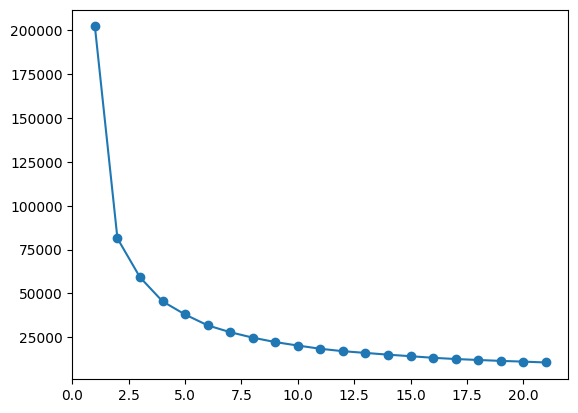

In [174]:
distortions = []
for i in range(1,22):
  km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
  km.fit(X_train)
  distortions.append(km.inertia_)
plt.plot(range(1,22), distortions, marker='o')

Por lo que observamos con el codo podemos usar 5-6 clusters para la clasificación

In [175]:
km= KMeans(n_clusters=5, init="random",n_init=12,max_iter=200,tol=1e-04,random_state=17)
km.fit(X_train)


KMeans(init='random', max_iter=200, n_clusters=5, n_init=12, random_state=17)

In [176]:
y_train = list(km.labels_)
X_train["cluster"] = y_train
X_train.head()

,MedInc,Latitude,Longitude,cluster
18567,3.1327,36.93,-121.75,3
19533,2.6523,37.66,-120.91,3
839,5.8704,37.60,-122.06,4
3333,1.8417,38.92,-122.62,3
12784,3.8295,38.65,-121.44,3


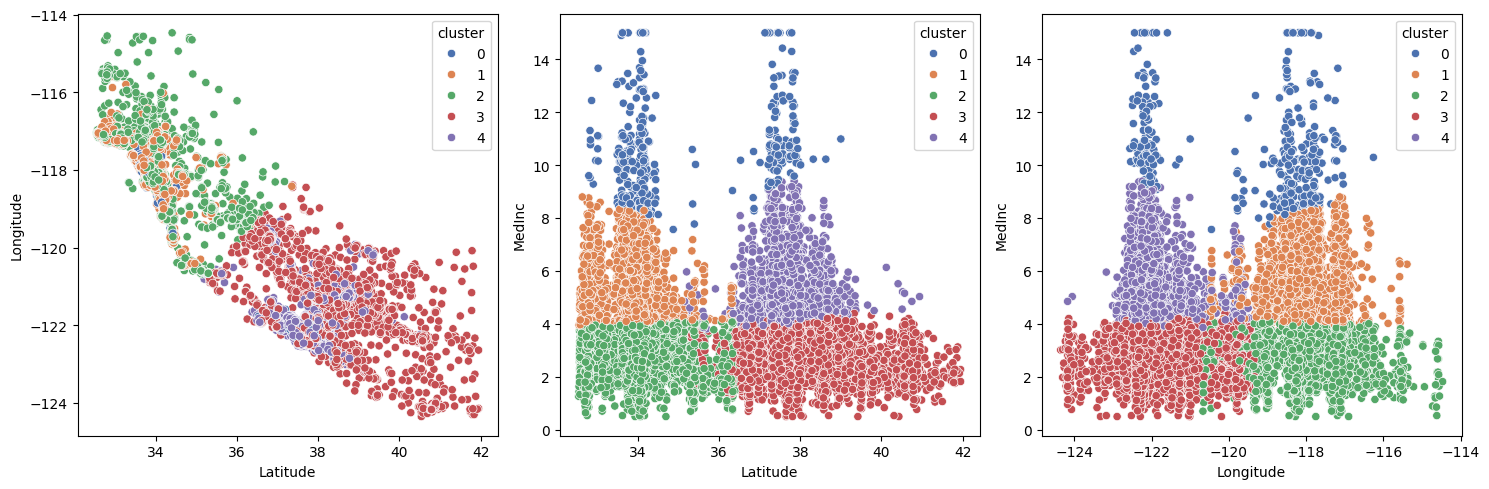

In [177]:
import seaborn as sns

fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep")
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep")
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep")
plt.tight_layout()

plt.show()

In [178]:
preds= km.predict(X_test)

y_test = list(km.predict(X_test))
X_test["cluster"] = y_test
X_test.head()


,MedInc,Latitude,Longitude,cluster
18403,5.4741,37.24,-121.84,4
13405,1.9583,34.10,-117.46,2
9539,2.6058,37.39,-120.71,3
8668,4.5817,33.82,-118.39,1
9019,8.0137,34.16,-118.78,1


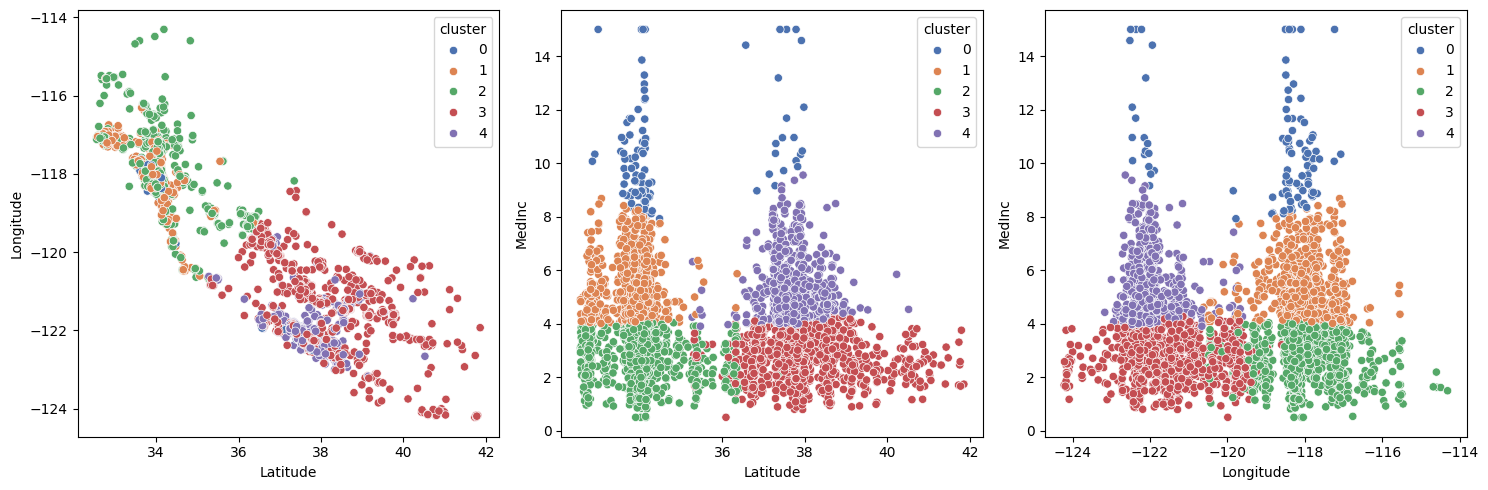

In [179]:
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_test, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep")
sns.scatterplot(ax = axis[1], data = X_test, x = "Latitude", y = "MedInc", hue = "cluster",palette = "deep")
sns.scatterplot(ax = axis[2], data = X_test, x = "Longitude", y = "MedInc", hue = "cluster",palette = "deep")
plt.tight_layout()

plt.show()

0.4280348526711389


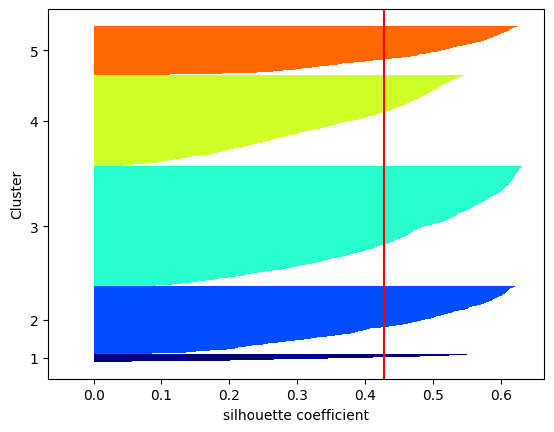

In [180]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(preds)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X_test,preds, metric='euclidean')
y_ax_lower, y_ax_upper = 0,0
yticks = []
for i,c in enumerate(cluster_labels):
  c_silhouette_vals = silhouette_vals[preds==c]
  c_silhouette_vals.sort()
  y_ax_upper += len(c_silhouette_vals)
  color = cm.jet(float(i)/n_clusters)
  plt.barh(range(y_ax_lower, y_ax_lower + len(c_silhouette_vals)), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
  yticks.append((y_ax_lower + y_ax_upper)/2.0)
  y_ax_lower += len(c_silhouette_vals)
  silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='red')
plt.yticks(yticks, cluster_labels+1)
plt.ylabel('Cluster')
plt.xlabel('silhouette coefficient')
print(silhouette_avg)

Podemos observar que con 5 clusters obtenemos un coeficiente de .4280 que indica que si bien estan relativamente bien agrupados no es un optimo.

In [187]:
km= KMeans(n_clusters=4, init="random",n_init=12,max_iter=200,tol=1e-04,random_state=17)
km.fit(X_train)

KMeans(init='random', max_iter=200, n_clusters=4, n_init=12, random_state=17)

In [188]:
preds2= km.predict(X_test)

0.43067984793551134


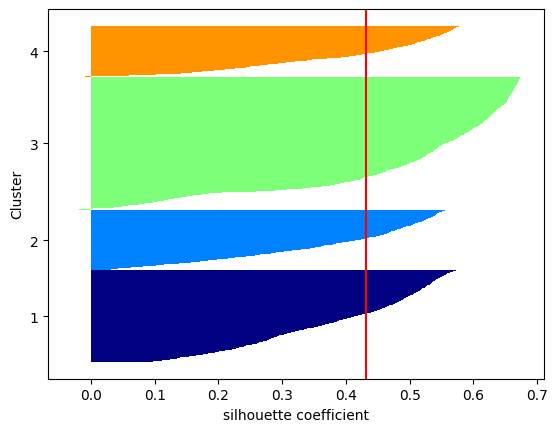

In [189]:
cluster_labels = np.unique(preds2)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X_test,preds2, metric='euclidean')
y_ax_lower, y_ax_upper = 0,0
yticks = []
for i,c in enumerate(cluster_labels):
  c_silhouette_vals = silhouette_vals[preds2==c]
  c_silhouette_vals.sort()
  y_ax_upper += len(c_silhouette_vals)
  color = cm.jet(float(i)/n_clusters)
  plt.barh(range(y_ax_lower, y_ax_lower + len(c_silhouette_vals)), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
  yticks.append((y_ax_lower + y_ax_upper)/2.0)
  y_ax_lower += len(c_silhouette_vals)
  silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='red')
plt.yticks(yticks, cluster_labels+1)
plt.ylabel('Cluster')
plt.xlabel('silhouette coefficient')
print(silhouette_avg)

con 6 clusters ganamos casi un 1% en el coeficiente sin embargo tal vez por la distribucion de los datos es mejor usar otra tecnica diferente a KMeans

In [200]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, silhouette_score


parametros= {
    'n_clusters': range(4, 10),
    'init': ['k-means++', 'random'], 
    'n_init': [10, 20,30],  
    'max_iter': [100, 200,300],  
    'tol': [1e-4, 1e-3]}

def custom_silhouette_score(estimator, X_test):
    labels = estimator.fit_predict(X_test)
    return silhouette_score(X_test, labels)

grid=GridSearchCV(estimator=km, param_grid=parametros, scoring=custom_silhouette_score, n_jobs=-1)


grid.fit(X_train)

print("Mejores parámetros:", grid.best_params_)
print("Mejor puntuación:", grid.best_score_)

/home/vscode/.local/lib/python3.10/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Mejores parámetros: {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 6, 'n_init': 20, 'tol': 0.0001}
Mejor puntuación: 0.4324289505907779


In [201]:
best_km=grid.best_estimator_
preds4=best_km.predict(X_test)

0.4351669301231217


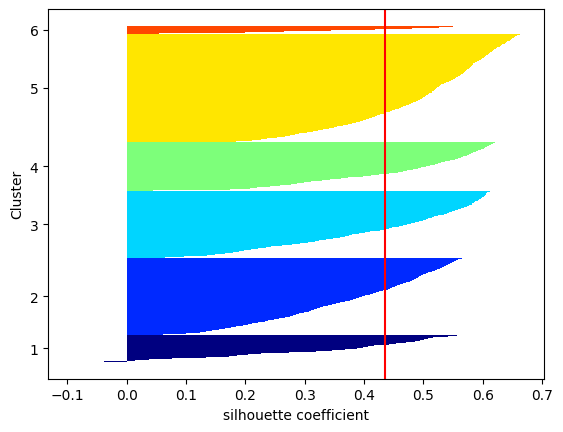

In [202]:
cluster_labels = np.unique(preds4)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X_test,preds4, metric='euclidean')
y_ax_lower, y_ax_upper = 0,0
yticks = []
for i,c in enumerate(cluster_labels):
  c_silhouette_vals = silhouette_vals[preds4==c]
  c_silhouette_vals.sort()
  y_ax_upper += len(c_silhouette_vals)
  color = cm.jet(float(i)/n_clusters)
  plt.barh(range(y_ax_lower, y_ax_lower + len(c_silhouette_vals)), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
  yticks.append((y_ax_lower + y_ax_upper)/2.0)
  y_ax_lower += len(c_silhouette_vals)
  silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='red')
plt.yticks(yticks, cluster_labels+1)
plt.ylabel('Cluster')
plt.xlabel('silhouette coefficient')
print(silhouette_avg)

Con el grid ganamos un .005 agregando al parecer un  tolerancia mas pequeña.

In [203]:
from sklearn.tree import DecisionTreeClassifier

arbol = DecisionTreeClassifier(random_state = 42)
arbol.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [206]:
preds5 = arbol.predict(X_test)
preds5

array([4, 2, 3, ..., 1, 1, 3], dtype=int32)

In [207]:
from sklearn.metrics import classification_report

print(classification_report(y_test, preds5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       833
           2       1.00      1.00      1.00      1469
           3       1.00      1.00      1.00      1124
           4       1.00      1.00      1.00       603

    accuracy                           1.00      4128
   macro avg       1.00      1.00      1.00      4128
weighted avg       1.00      1.00      1.00      4128

